In [599]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix

In [600]:
df = pd.read_csv("Minerals_Database.csv")

In [601]:
df.head(10)

Unnamed: 0             Name  Crystal Structure  Mohs Hardness  Diaphaneity  \
0           0  Abenakiite-(Ce)                5.0           4.50          0.0   
1           1     Abernathyite                4.0           2.75          3.0   
2           2         Abhurite                5.0           2.00          3.0   
3           3   Abswurmbachite                0.0           0.00          0.0   
4           4       Actinolite                2.0           5.50          2.0   
5           5        Acuminite                2.0           3.50          3.0   
6           6          Adamite                3.0           3.50          0.0   
7           7          Adelite                0.0           0.00          0.0   
8           8        Admontite                2.0           2.50          0.0   
9           9         Aegirine                2.0           6.00          1.0   

   Specific Gravity  Optical  Refractive Index  Dispersion  Hydrogen  ...  \
0             3.240      3.0             1.580         0.0       0.0  ...   
1             3.446      3.0             1.592         0.0       1.0  ...   
2             4.420      3.0             2.085         0.0       3.0  ...   
3             0.000      0.0             0.000         0.0       0.0  ...   
4             1.050      4.0             1.634         0.0       1.0  ...   
5             3.295      4.0             1.457         0.0       0.0  ...   
6             4.400      4.0             1.742         0.0       1.0  ...   
7             0.000      0.0             0.000         0.0       1.0  ...   
8             0.000      4.0             1.473         0.0      14.0  ...   
9             3.550      4.0             1.776         0.0       0.0  ...   

   Acetate  Phosphate  Sulphate  Carbonate  Ammonium  Hydrated Water  count  \
0      0.0        0.0       0.0        0.0       0.0             0.0   23.0   
1      0.0        0.0       0.0        0.0       0.0             1.0    9.0   
2      0.0        0.0       0.0        0.0       0.0             0.0   17.0   
3      0.0        0.0       0.0        0.0       0.0             0.0   12.0   
4      0.0        0.0       0.0        0.0       0.0             0.0   28.0   
5      0.0        0.0       0.0        0.0       0.0             1.0    8.0   
6      0.0        0.0       0.0        0.0       0.0             0.0    8.0   
7      0.0        0.0       0.0        0.0       0.0             0.0   10.0   
8      0.0        0.0       0.0        0.0       0.0             4.0   39.0   
9      0.0        0.0       0.0        0.0       0.0             0.0    6.0   

   Molar Mass  Molar Volume  Calculated Density  
0  817.339002      0.123390               5.498  
1  435.069330      0.056083               6.439  
2  921.092220      0.122631               6.234  
3  550.019900      0.033658              13.563  
4  861.185368      0.112074               6.378  
5  225.618151      0.044887               4.172  
6  270.707130      0.056025               4.010  
7  251.283292      0.067260               3.101  
8  407.639360      0.302614               1.118  
9  154.920468      0.033631               3.823  

[10 rows x 140 columns]

In [602]:
pd.set_option('display.max_rows', None)
df

Unnamed: 0                            Name  Crystal Structure  \
0              0                 Abenakiite-(Ce)                5.0   
1              1                    Abernathyite                4.0   
2              2                        Abhurite                5.0   
3              3                  Abswurmbachite                0.0   
4              4                      Actinolite                2.0   
5              5                       Acuminite                2.0   
6              6                         Adamite                3.0   
7              7                         Adelite                0.0   
8              8                       Admontite                2.0   
9              9                        Aegirine                2.0   
10            10                     Aenigmatite                1.0   
11            11                        Aerinite                2.0   
12            12                        Aerugite                5.0   
13            13                       Afghanite                5.0   
14            14                       Afwillite                2.0   
15            15                       Agrellite                1.0   
16            16                     Agrinierite                0.0   
17            17                      Ahlfeldite                2.0   
18            18                          Ajoite                1.0   
19            19                      Akaganeite                2.0   
20            20                      Akatoreite                0.0   
21            21                       Akdalaite                0.0   
22            22                      Akermanite                4.0   
23            23                     Akhtenskite                5.0   
24            24                      Akimotoite                5.0   
25            25                    Akrochordite                2.0   
26            26                         Aksaite                3.0   
27            27                       Alamosite                2.0   
28            28                        Alarsite                0.0   
29            29                          Albite                1.0   
30            30              Albrechtschraufite                0.0   
31            31                       Alforsite                5.0   
32            32                       Allactite                2.0   
33            33                   Allanpringite                2.0   
34            34                    Alleghanyite                2.0   
35            35                      Alluaivite                5.0   
36            36                      Alluaudite                2.0   
37            37                      Almarudite                0.0   
38            38                Alsakharovite-Zn                0.0   
39            39                      Althausite                3.0   
40            40                       Althupite                0.0   
41            41                        Altisite                0.0   
42            42                        Alum-(K)                6.0   
43            43                       Aluminite                2.0   
44            44                         Alunite                5.0   
45            45                        Alunogen                1.0   
46            46                      Amarantite                1.0   
47            47                     Amblygonite                1.0   
48            48                      Ameghinite                2.0   
49            49                         Amesite                1.0   
50            50                         Amicite                2.0   
51            51                        Anandite                2.0   
52            52                        Anapaite                1.0   
53            53                         Anatase                4.0   
54            54                      Andalusite                3.0   
55            55              

In [603]:
df.shape

(3112, 140)

In [604]:
df.describe()

Unnamed: 0  Crystal Structure  Mohs Hardness  Diaphaneity  \
count  3112.000000        3112.000000    3112.000000  3112.000000   
mean   1555.500000           0.677057       0.845925     0.405206   
std     898.501345           1.388575       1.844267     0.877966   
min       0.000000           0.000000       0.000000     0.000000   
25%     777.750000           0.000000       0.000000     0.000000   
50%    1555.500000           0.000000       0.000000     0.000000   
75%    2333.250000           0.000000       0.000000     0.000000   
max    3111.000000           6.000000       9.500000     3.000000   

       Specific Gravity      Optical  Refractive Index   Dispersion  \
count       3112.000000  3112.000000       3112.000000  3112.000000   
mean           0.666800     0.701157          0.323626     0.000459   
std            1.481692     1.456768          0.678769     0.006851   
min            0.000000     0.000000          0.000000     0.000000   
25%            0.000000     0.000000          0.000000     0.000000   
50%            0.000000     0.000000          0.000000     0.000000   
75%            0.000000     0.000000          0.000000     0.000000   
max            9.593000     4.000000          3.383000     0.213000   

          Hydrogen       Helium  ...  Acetate  Phosphate  Sulphate  Carbonate  \
count  3112.000000  3112.000000  ...   3112.0     3112.0    3112.0     3112.0   
mean      1.311375     0.000321  ...      0.0        0.0       0.0        0.0   
std       3.643521     0.017926  ...      0.0        0.0       0.0        0.0   
min       0.000000     0.000000  ...      0.0        0.0       0.0        0.0   
25%       0.000000     0.000000  ...      0.0        0.0       0.0        0.0   
50%       0.000000     0.000000  ...      0.0        0.0       0.0        0.0   
75%       1.000000     0.000000  ...      0.0        0.0       0.0        0.0   
max      48.000000     1.000000  ...      0.0        0.0       0.0        0.0   

          Ammonium  Hydrated Water        count    Molar Mass  Molar Volume  \
count  3112.000000     3112.000000  3112.000000   3112.000000   3112.000000   
mean      0.002892        0.903920    19.755463    607.052968      0.110810   
std       0.064578        2.654198    19.762060    673.908663      0.117827   
min       0.000000        0.000000     1.000000      1.007940      0.011030   
25%       0.000000        0.000000     8.000000    239.417117      0.044832   
50%       0.000000        0.000000    15.000000    411.769265      0.078555   
75%       0.000000        0.000000    25.000000    747.094885      0.134544   
max       2.000000       43.000000   385.000000  14241.839600      1.962209   

       Calculated Density  
count          3112.00000  
mean              5.28411  
std               2.86038  
min               0.07500  
25%               3.15475  
50%               4.82150  
75%               6.80450  
max              13.98600  

[8 rows x 139 columns]

In [605]:
df.columns

Index(['Unnamed: 0', 'Name', 'Crystal Structure', 'Mohs Hardness',
       'Diaphaneity', 'Specific Gravity', 'Optical', 'Refractive Index',
       'Dispersion', 'Hydrogen',
       ...
       'Acetate', 'Phosphate', 'Sulphate', 'Carbonate', 'Ammonium',
       'Hydrated Water', 'count', 'Molar Mass', 'Molar Volume',
       'Calculated Density'],
      dtype='object', length=140)

In [606]:
df.duplicated().sum()
#To check for any duplicates

0

In [607]:
df.isnull().sum()

Unnamed: 0            0
Name                  0
Crystal Structure     0
Mohs Hardness         0
Diaphaneity           0
Specific Gravity      0
Optical               0
Refractive Index      0
Dispersion            0
Hydrogen              0
Helium                0
Lithium               0
Beryllium             0
Boron                 0
Carbon                0
Nitrogen              0
Oxygen                0
Fluorine              0
Neon                  0
Sodium                0
Magnesium             0
Aluminium             0
Silicon               0
Phosphorus            0
Sulfur                0
Chlorine              0
Argon                 0
Potassium             0
Calcium               0
Scandium              0
Titanium              0
Vanadium              0
Chromium              0
Manganese             0
Iron                  0
Cobalt                0
Nickel                0
Copper                0
Zinc                  0
Gallium               0
Germanium             0
Arsenic         

<AxesSubplot:xlabel='Crystal Structure', ylabel='count'>

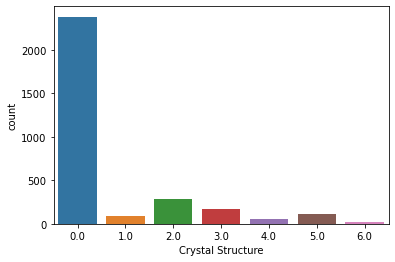

In [608]:
sns.countplot(data=df,x = 'Crystal Structure')

In [609]:
X = df.drop(columns=["Unnamed: 0", "Name", "Crystal Structure","Refractive Index"])
#"Dispersion"Mohs Hardness", "Diaphaneity", "Specific Gravity", "Optical"
y = df["Crystal Structure"]
y

0       5.0
1       4.0
2       5.0
3       0.0
4       2.0
5       2.0
6       3.0
7       0.0
8       2.0
9       2.0
10      1.0
11      2.0
12      5.0
13      5.0
14      2.0
15      1.0
16      0.0
17      2.0
18      1.0
19      2.0
20      0.0
21      0.0
22      4.0
23      5.0
24      5.0
25      2.0
26      3.0
27      2.0
28      0.0
29      1.0
30      0.0
31      5.0
32      2.0
33      2.0
34      2.0
35      5.0
36      2.0
37      0.0
38      0.0
39      3.0
40      0.0
41      0.0
42      6.0
43      2.0
44      5.0
45      1.0
46      1.0
47      1.0
48      2.0
49      1.0
50      2.0
51      2.0
52      1.0
53      4.0
54      3.0
55      5.0
56      1.0
57      6.0
58      2.0
59      3.0
60      2.0
61      2.0
62      1.0
63      1.0
64      5.0
65      3.0
66      0.0
67      3.0
68      5.0
69      3.0
70      3.0
71      3.0
72      0.0
73      0.0
74      2.0
75      4.0
76      3.0
77      3.0
78      6.0
79      2.0
80      2.0
81      1.0
82      4.0
83  

In [610]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [611]:
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train, copy=True)
scale.fit(X_test)
X_test = scale.transform(X_test, copy=True)
y_train

1740    0.0
907     0.0
2725    0.0
2686    0.0
3008    0.0
911     0.0
1850    0.0
632     2.0
2323    0.0
445     3.0
617     2.0
1345    0.0
2418    0.0
2473    0.0
1292    0.0
1697    0.0
844     0.0
2650    0.0
547     4.0
1973    0.0
1123    0.0
2584    0.0
263     5.0
2372    0.0
2443    0.0
1964    0.0
353     0.0
802     2.0
208     3.0
613     2.0
1025    0.0
2230    0.0
2242    0.0
1241    0.0
2580    0.0
1896    0.0
2621    0.0
57      6.0
2996    0.0
811     0.0
2955    0.0
561     5.0
2127    0.0
229     0.0
2605    0.0
2117    0.0
1793    0.0
538     5.0
1565    0.0
2484    0.0
2920    0.0
2901    0.0
2313    0.0
560     2.0
1322    0.0
707     3.0
424     3.0
69      3.0
1602    0.0
1316    0.0
647     1.0
2241    0.0
2783    0.0
2023    0.0
1779    0.0
2679    0.0
2658    0.0
2176    0.0
620     2.0
1017    0.0
2268    0.0
2960    0.0
1356    0.0
1637    0.0
1609    0.0
1047    0.0
2766    0.0
1518    0.0
279     5.0
998     0.0
1330    0.0
2570    0.0
1803    0.0
166 


# LINEAR REGRESSION

In [612]:
model = LinearRegression()

# Fit the model to the data
model.fit(X_train,y_train)
y_pred_LR = model.predict(X_test)

In [613]:
# Compute the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_LR))
print("Root mean squared error:", rmse)

# Compute the R-squared score
r2 = r2_score(y_test, y_pred_LR)
print("R-squared score:", r2)

Root mean squared error: 59448125238229.73
R-squared score: -1.913308702738033e+27


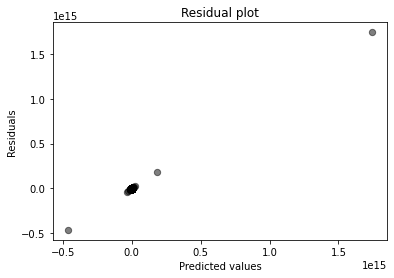

In [614]:
# Plot the residuals
plt.scatter(y_pred_LR, y_pred_LR- y_test, c='black', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=1)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()
#Residual should be close to zero for all the predictions for a model to be good

# DECISION TREE

In [615]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [616]:
y_pred=clf.predict(X_test)
y_pred

array([6., 1., 0., 0., 2., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
       5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 3.,
       0., 0., 3., 0., 0., 0., 3., 0., 0., 0., 2., 3., 2., 0., 3., 0., 0.,
       0., 5., 0., 3., 0., 0., 3., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0.,
       0., 0., 0., 0., 3., 0., 5., 0., 0., 0., 0., 0., 2., 3., 2., 0., 0.,
       0., 2., 0., 0., 0., 2., 0., 2., 0., 0., 0., 5., 2., 0., 2., 2., 0.,
       0., 2., 2., 0., 0., 3., 5., 0., 4., 0., 0., 0., 0., 0., 3., 2., 0.,
       0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 2., 0., 3., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 1., 0., 0., 0., 3.,
       0., 1., 4., 0., 2., 0., 5., 2., 5., 0., 5., 0., 0., 0., 2., 2., 0.,
       0., 3., 5., 0., 0., 0., 0., 0., 0., 0., 5., 0., 0., 1., 2., 0., 0.,
       0., 0., 0., 2., 0., 0., 2., 0., 0., 2., 0., 0., 2., 0., 0., 3., 2.,
       0., 0., 0., 0., 0., 1., 0., 2., 0., 4., 0., 2., 0., 0., 0., 0., 0.,
       3., 0., 2., 0., 0.

In [617]:
# Calculate the R² score
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.6539521340108679


In [618]:
accuracy_score_test = accuracy_score(y_test, y_pred)
print('Test accuracy score:', round(accuracy_score_test * 100, 2))

Test accuracy score: 82.87


# Hyperparameter Tuning for DT

In [619]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# define the model
model = DecisionTreeClassifier()

# define the parameter distribution
param_dist = {
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11)
}

# define the randomized search
hyp_model = RandomizedSearchCV(model, param_distributions=param_dist, cv=5)

# fit the randomized search
hyp_model.fit(X_train, y_train)



RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000231AC62E070>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002319BA35F40>})

In [620]:
y_pred_test = hyp_model.predict(X_test)
accuracy_Hyper_DT = accuracy_score(y_test, y_pred_test)
accuracy_Hyper_DT*100

84.47537473233405

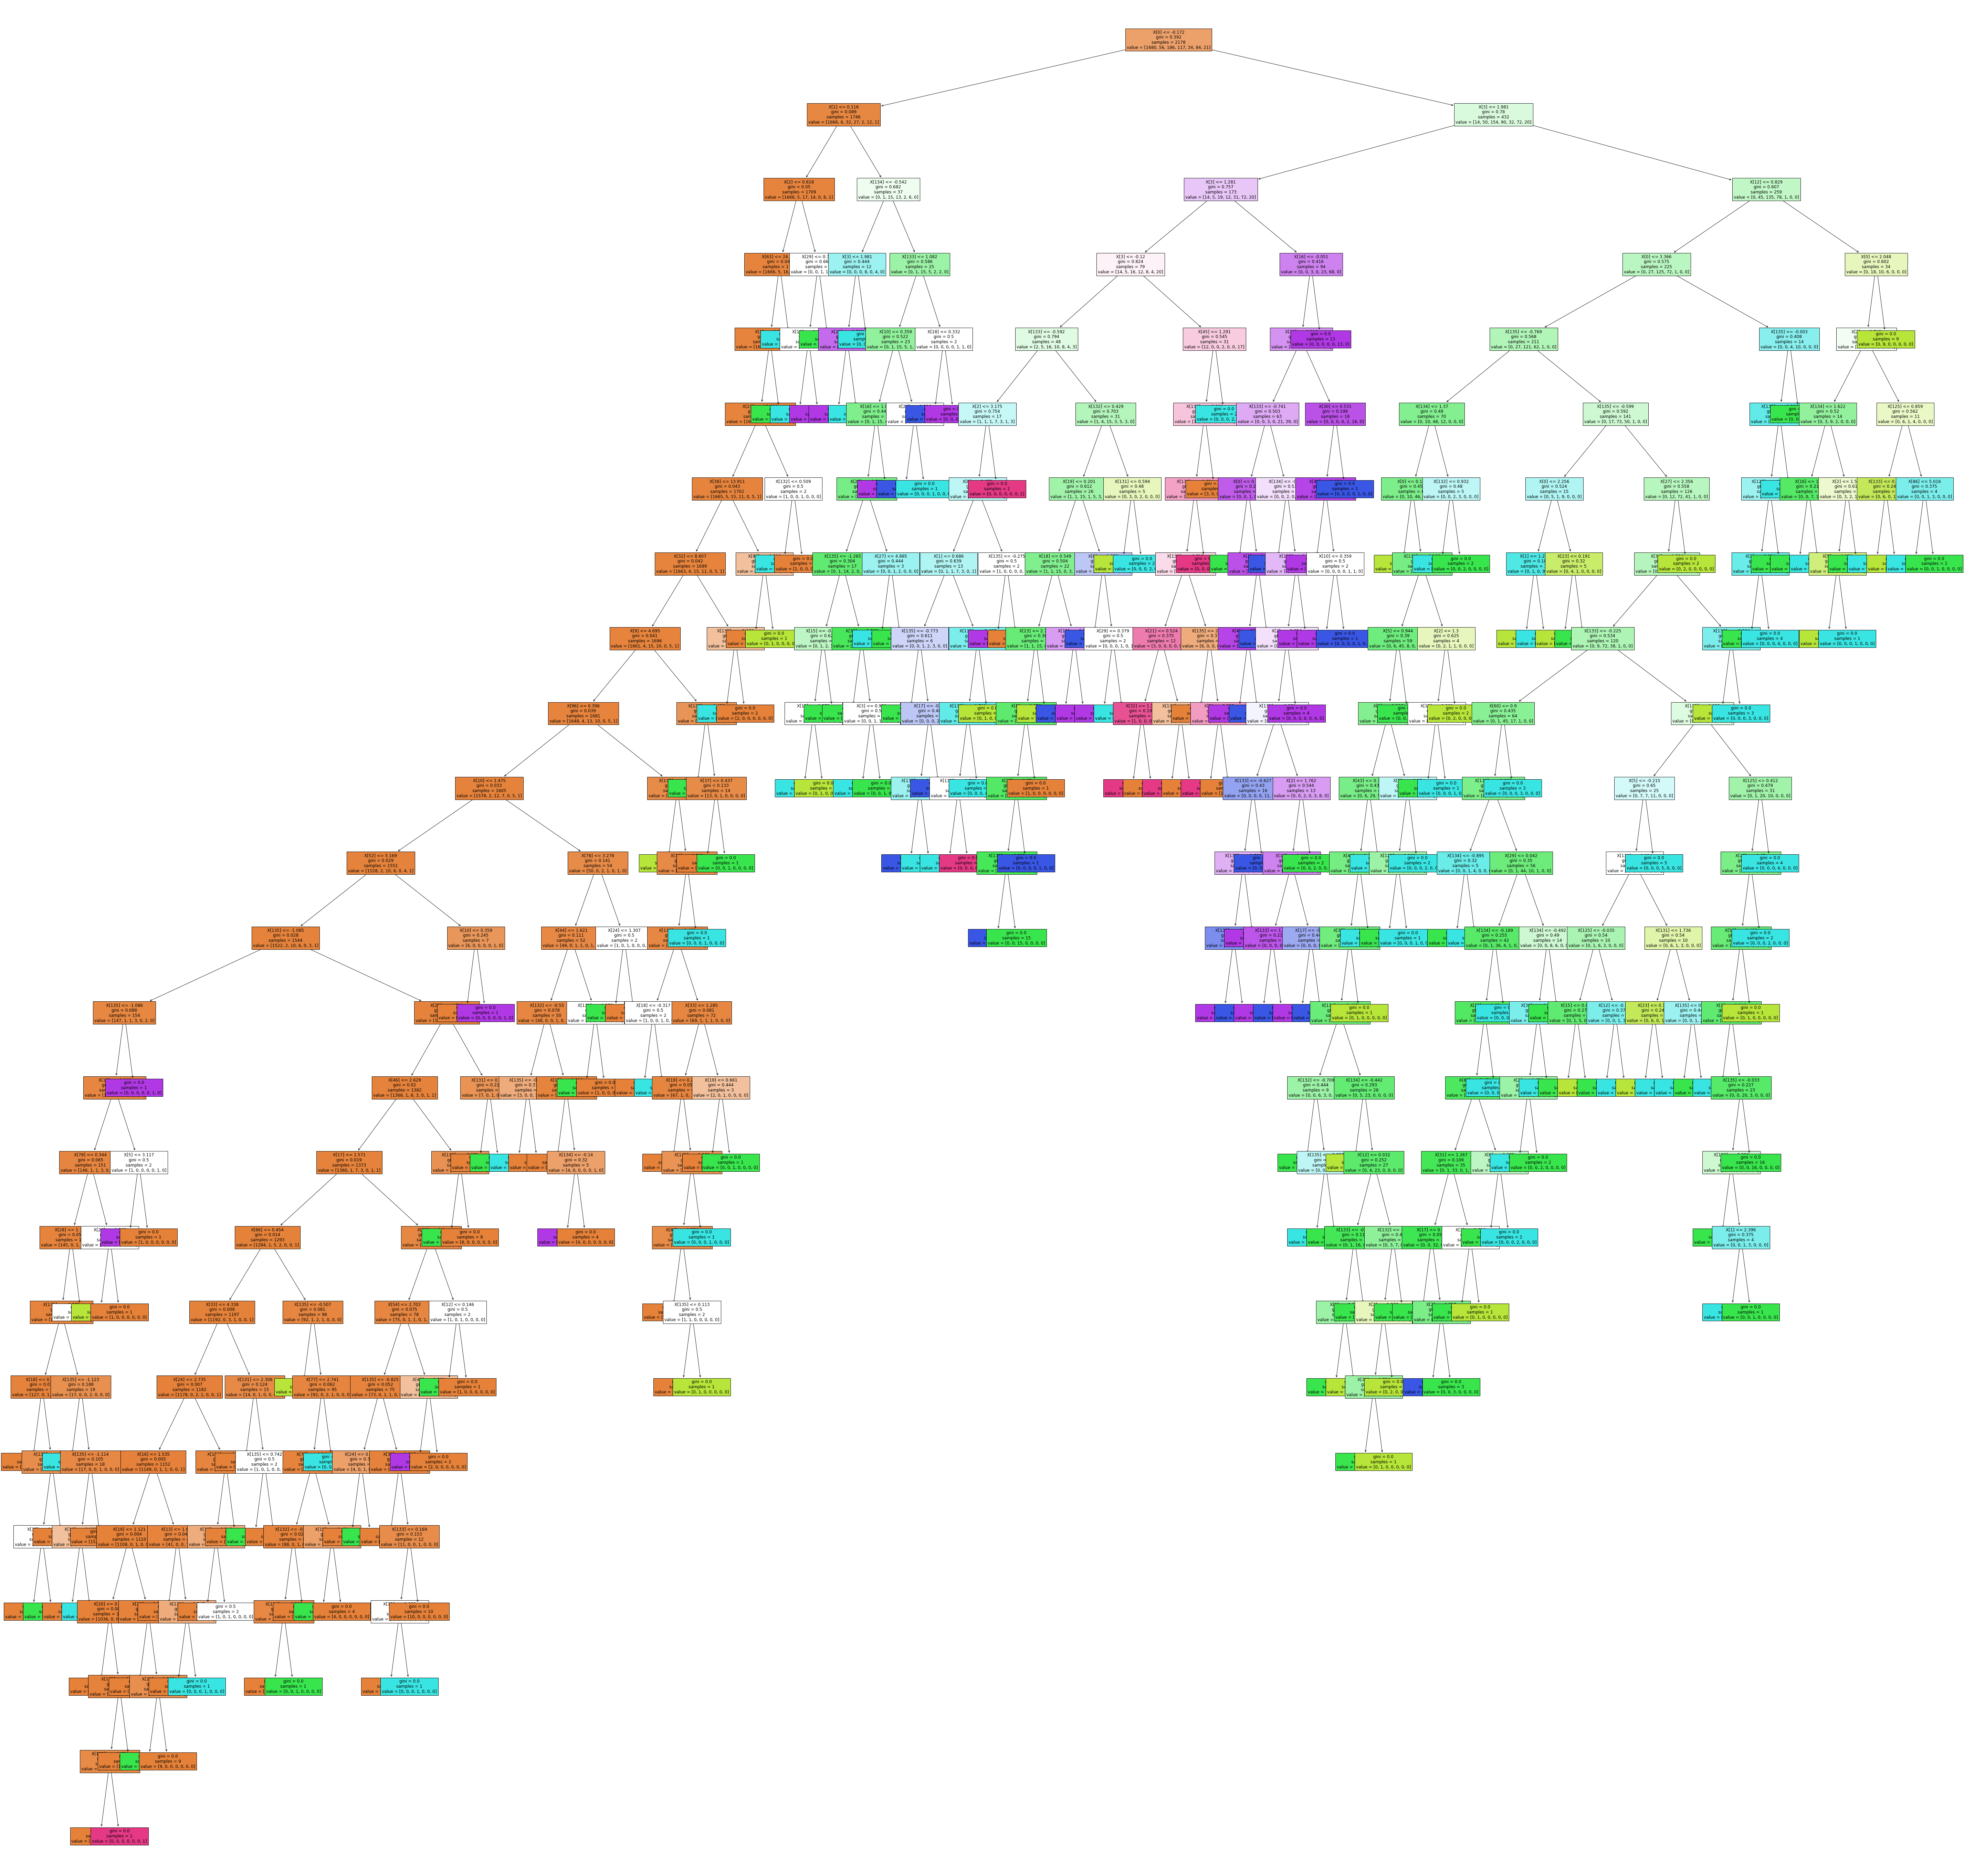

In [621]:
from sklearn import tree
plt.figure(figsize=(100,100))
_=tree.plot_tree(clf,filled=True,fontsize=12)

# K-Nearest Neighbours

In [622]:
from sklearn.neighbors import KNeighborsClassifier
knnclf=KNeighborsClassifier(n_neighbors=25)
knnclf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [623]:
y_pred_KNN=knnclf.predict(X_test)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
accuracy_KNN*100

81.26338329764454

# RANDOM FOREST


In [624]:
forest=RandomForestClassifier(n_estimators=200,random_state=42)
forest.fit(X_train,y_train)
y_pred_RF = forest.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
accuracy_RF*100


86.50963597430406

In [625]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model2 = RandomForestClassifier()

hyp_model2 = RandomizedSearchCV(model2, param_distributions=param_dist, n_iter=50)

hyp_model2.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002319086DF70>})

In [626]:
y_pred_test = hyp_model2.predict(X_test)
accuracy_Hyper_RF = accuracy_score(y_test, y_pred_test)
accuracy_Hyper_RF

0.8661670235546038